In [193]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
import numpy as np

Neighborhood_shp=gpd.read_file("data/Neighborhood.shp")
Flickr_NewYork = pd.read_csv('data/Flickr_NewYork.csv',header=None)

#### Task 1 (20 pts): Explore and visualize NYC boundary and Flickr photo location data. geographic data. Use GeoPandas to load the NYC “Neighborhood.shp” shapefile. You should be able to download the shapefile. The locations of Flickr data are in the file “Flickr_NewYork.csv” under the “data” folder. Use Pandas to load the csv file, and then plot the Flickr photo locations on the NYC map. Your figure should look like below:

In [194]:
Flickr_NewYork_df=Flickr_NewYork.iloc[:,2:4]
Flickr_NewYork_km=Flickr_NewYork.iloc[:,2:4]
Flickr_NewYork_df.head()

,2,3
0,40.677180,-73.983092
1,40.684333,-74.002667
2,40.753677,-73.977212
3,40.748427,-73.985409
4,40.759694,-73.978930


In [195]:
CRS = Neighborhood_shp.crs

Flickr_NewYork_geo=gpd.GeoDataFrame(Flickr_NewYork_df, geometry=gpd.points_from_xy(Flickr_NewYork_df.iloc[:,1], Flickr_NewYork_df.iloc[:,0]), crs=CRS)
# Flickr_NewYork_geo.plot()

Text(0.5, 1.0, ' Flickr photo locations')

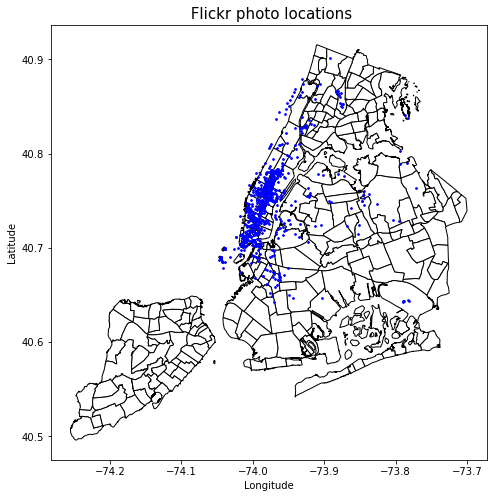

In [196]:
fig, ax = plt.subplots(figsize=(10,8))
Neighborhood_shp.plot(ax=ax, color='white', edgecolor='black')
Flickr_NewYork_geo.plot(ax=ax,marker="o", color='blue', markersize=3)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(" Flickr photo locations", fontsize = 15)

#### Task 2 (30 pts): Use silhouette to determine the k for K-means clustering. In our first attempt, we will try to cluster the locations of Flickr photos using K-means. Since we don’t know how many clusters there are in NYC, we will first use silhouette to determine the k in a data-driven manner. Test k from 5 to 20, and plot the silhouette figure. Your figure should look like below. Note that you must initialize your kmeans model by setting random_state=42 in order to get the same figure.


In [197]:
scores = []
for k in range(5, 20):
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    y_label = kmeans_model.fit_predict(Flickr_NewYork_km)
    scores.append(silhouette_score(Flickr_NewYork_km,y_label))

Text(0, 0.5, 'Silhouette Score')

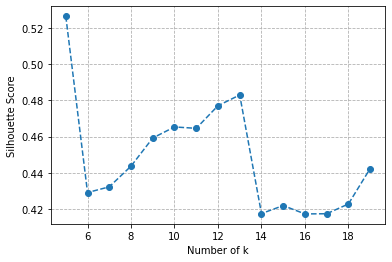

In [198]:
plt.plot(range(5,20), scores,"o--")
plt.grid(linestyle="--")
plt.xlabel("Number of k")
plt.ylabel("Silhouette Score")

#### Task 3 (25 pts): K-means clustering. The result suggests that maybe k=13 is a good value, so let’s set k=13 for the K-means model. Create your model and use it to cluster the photo locations, and visualize the result. 

In [199]:
kmeans_model = KMeans(n_clusters=13, random_state=42)
y_label = kmeans_model.fit_predict(Flickr_NewYork_km)
color_array = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075']


Text(0.5, 1.0, ' K-Means cluster=13')

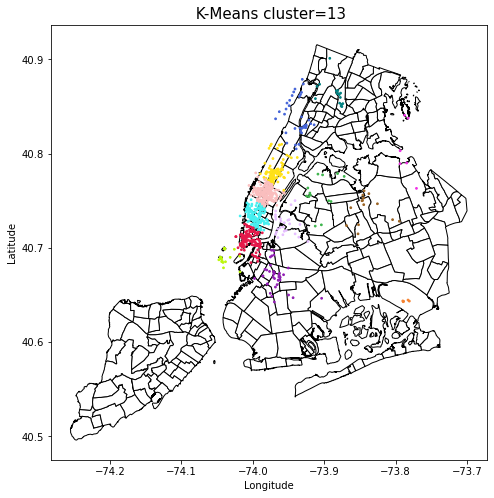

In [200]:
color=[]
for i in range(len(y_label)):
    color.append(color_array[y_label[i]])
    
Flickr_NewYork_geo=Flickr_NewYork_geo.assign(col=color)

fig, ax = plt.subplots(figsize=(10,8))
Neighborhood_shp.plot(ax=ax, color='white', edgecolor='black')
Flickr_NewYork_geo.plot(ax=ax,marker="o", color=Flickr_NewYork_geo.col, markersize=3)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(" K-Means cluster=13", fontsize = 15)

#### Task 4 (25 pts): DBSCAN clustering. Use 0.002 for Eps and 5 for MinPts, and create a DBSCAN model to cluster the location points.

In [201]:
dbscan = DBSCAN(eps=0.002,min_samples=5)

dbscan_label = dbscan.fit_predict(Flickr_NewYork_km) # predict clusters
cluster_count = len(set(dbscan_label))
cluster_count = cluster_count-1
# get the number of clusters
# the following code define the color array based on the number of clusters
np.random.seed(42)
color_array_rand = []
for i in range(cluster_count):
    color_array_rand.append('#'+'%06X' % np.random.randint(0, 0xFFFFFF))

color_array_rand.insert(0,"#000000")
    
# dbscan_label.min()
# len(color_array_rand)
# len(dbscan_label)

color_db=[]
for i in range(len(dbscan_label)):
    color_db.append(color_array_rand[dbscan_label[i]+1])


Flickr_NewYork_geo=Flickr_NewYork_geo.assign(col_dbscan=color_db)

Text(0.5, 1.0, ' DBSCAN')

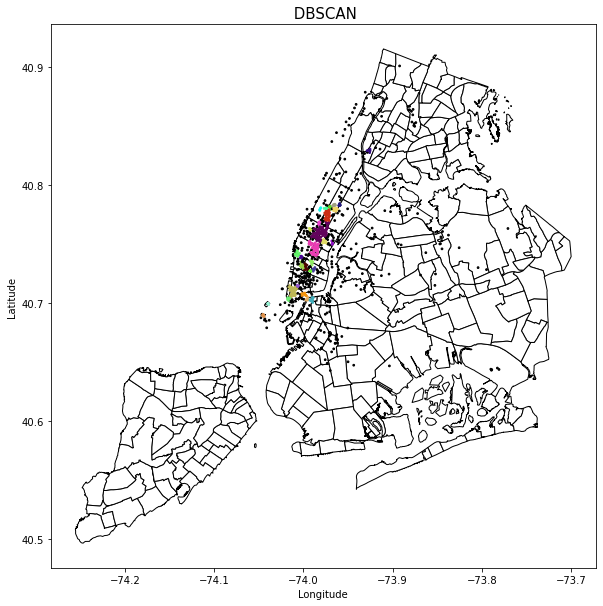

In [202]:
fig, ax = plt.subplots(figsize=(20,10))
Neighborhood_shp.plot(ax=ax, color='white', edgecolor='black')
Flickr_NewYork_geo.plot(ax=ax,marker="o", color=Flickr_NewYork_geo.col_dbscan, markersize=3)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(" DBSCAN", fontsize = 15)

(-74.05, -73.92, 40.67, 40.83)

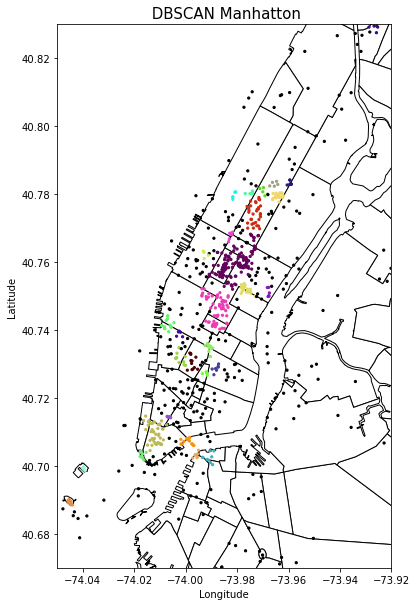

In [203]:
fig, ax = plt.subplots(figsize=(20,10))
Neighborhood_shp.plot(ax=ax, color='white', edgecolor='black')
Flickr_NewYork_geo.plot(ax=ax,marker="o", color=Flickr_NewYork_geo.col_dbscan, markersize=5)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(" DBSCAN Manhatton", fontsize = 15)
plt.axis([-74.05,-73.92,40.67,40.83])